# Video processing

In this notebook, we provide a tutorial of how to properly call the functions build to process various biofilm growth videos. This includes

- Loading video frames
- Extracting the wrinkle class over time
- Computing the evolution of percentage of wrinkle area over time

You will find all the necessary functions in the `.py` file `image_processing_functions.py`



In [1]:
# Additional python packages
import os, urllib, io, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL
from PIL import Image
import cv2
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
import  image_processing_functions as img
from tqdm import tqdm_notebook
# Our functions

## Loading video frames and cropping out biofilms

In this tutorial, we will use a video containing two biofilms that were grown simultaneously. We will compare different features of those biofilms over time.

In [13]:
cap = cv2.VideoCapture('/home/khalana/Downloads/181129 (Converted).mov.mov')

In [14]:
frameCount  = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
X           = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
fc          = 0
ret         = True

while (fc < frameCount  and ret):
    ret, X[fc] = cap.read()
    fc += 1

Here is a frame of the original video. Now that we have extracted the frames of the videos, we crop out the left and right biofilms from those frames.

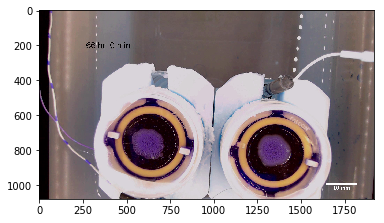

In [17]:
plt.imshow(X[78])

### Cropping
Since the videos provided were not centered or standard in format, you have to find the proper bounding box to crop the frames

Text(0.5,1,'right biofilm')

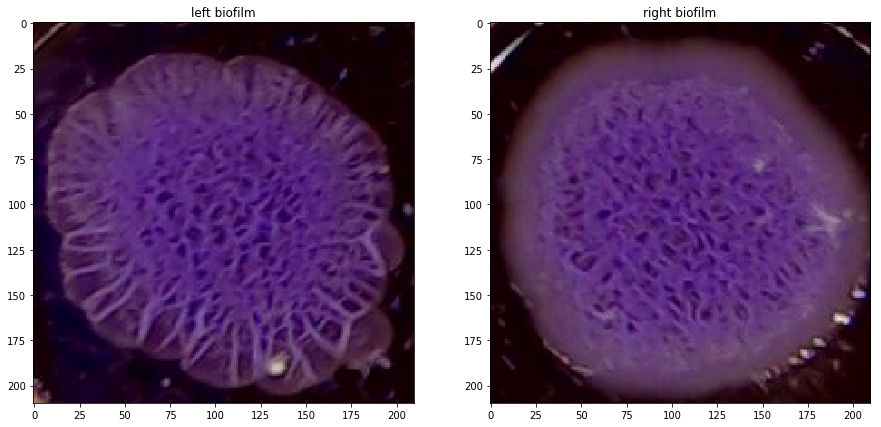

In [20]:
# # cropping for video 180918.mov
# left_biofilm = [x[450:700,450:700] for x in X]
# right_biofilm = [x[450:700,1100:1350] for x in X]

# cropping for video 181129.avi
left_biofilm = [x[655:865,520:730] for x in X[2:]]
right_biofilm = [x[695:905,1240:1450] for x in X[2:]]

f, axarr = plt.subplots(1, 2, figsize = (15,15))
axarr[0].imshow(left_biofilm[-1])
axarr[0].set_title('left biofilm')
axarr[1].imshow(right_biofilm[-1])
axarr[1].set_title('right biofilm')

Now that we have cropped the desirable frames, we can compute various features on them. Let's plot the wrinkles and percentage wrinkles over time :

## Visualizing wrinkles over time

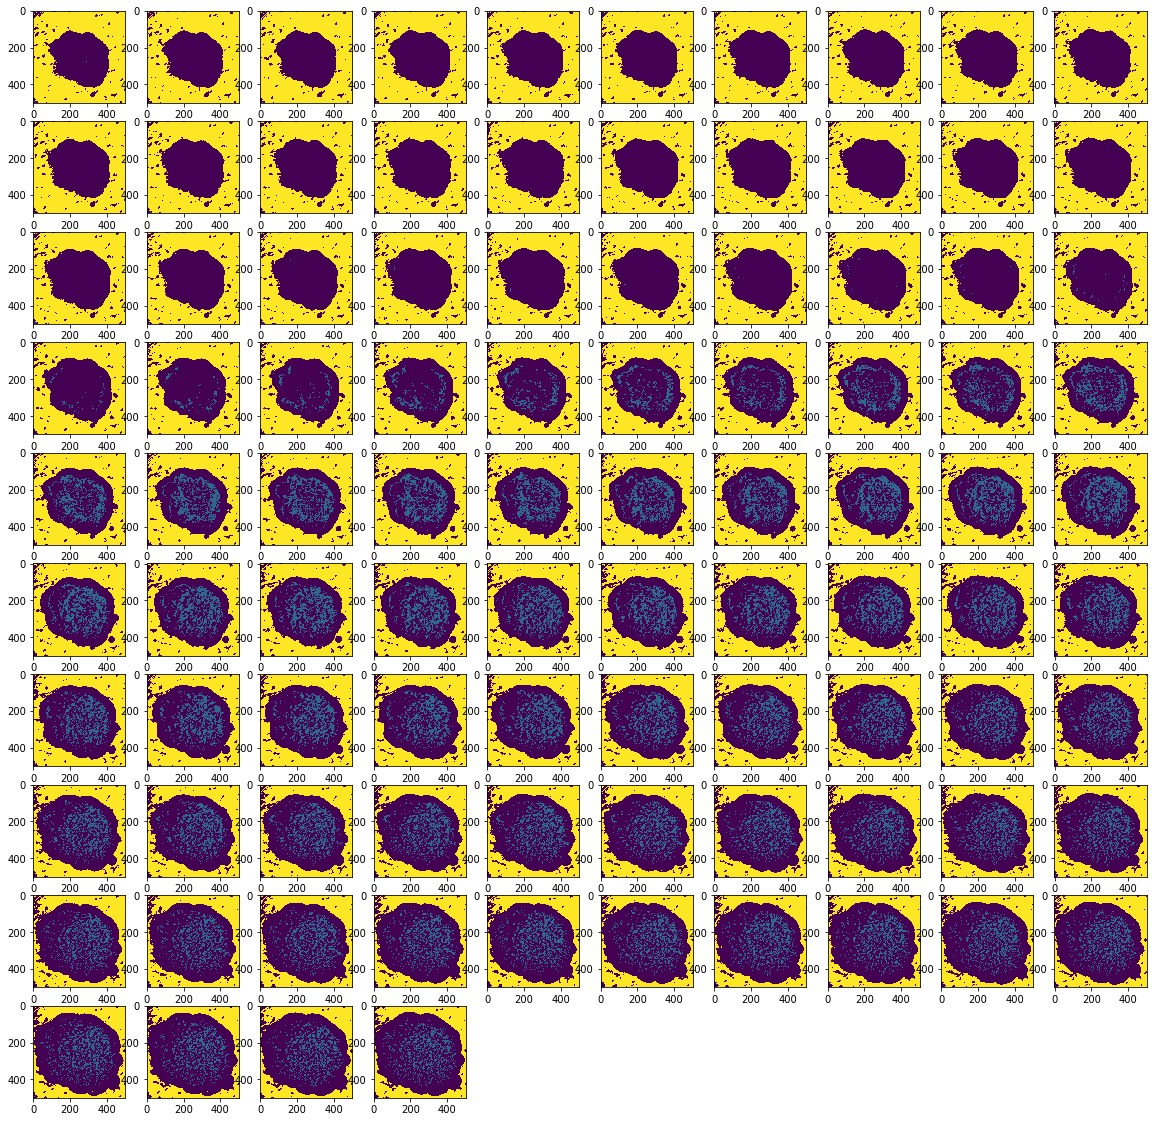

In [57]:
frames_to_save = []
labels_list = []
fig = plt.figure(figsize=(20,20))
n = int(np.sqrt(len(left_biofilm)))+1

for i,s in enumerate(left_biofilm):
    try:
        labels, wrinkles= img.get_wrinkles(s, is_movie = True, background_is_black = True)
        frames_to_save.append(wrinkles)
        labels_list.append(labels)
        fig.add_subplot(n,n,i+1)
        plt.imshow(wrinkles)
        title = 'gene: %s | day %d' %(df_all['gene'][i],df_all['days'][i])
        plt.title(title)
    except:
        pass
plt.show()

Let's compare how the amount of wrinkled area varies over time for the two biofilms

In [111]:
pw_list_left = []
pw_list_right = []
left_labels_list = []
right_labels_list = []
left_frames_to_save = []
right_frames_to_save = []

print('there are %d iterations in this for loop' %len(left_biofilm))
for left,right in tqdm_notebook(zip(left_biofilm,right_biofilm)):
    
    left_labels, left_wrinkles= img.get_wrinkles(left, is_movie = True, background_is_black = True)
    left_frames_to_save.append(left_wrinkles)
    left_labels_list.append(left_labels)
    pw_list_left.append(img.perc_wrinkled(left_labels))
    
    right_labels, right_wrinkles= img.get_wrinkles(right, is_movie = True, background_is_black = True)
    right_frames_to_save.append(right_wrinkles)
    right_labels_list.append(right_labels)
    pw_list_right.append(img.perc_wrinkled(right_labels))


there are 94 iterations in this for loop


## Percent Wrinkle over Time

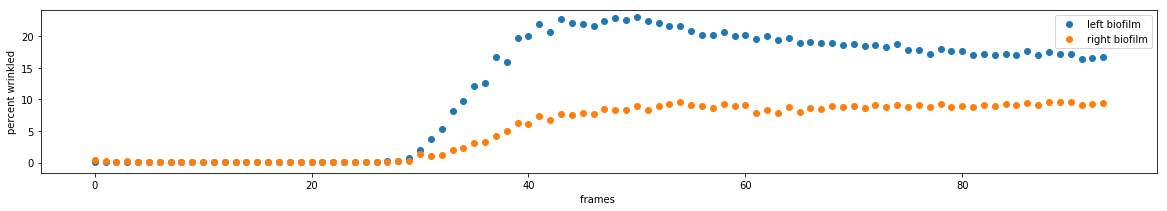

In [112]:
fig = plt.figure(figsize=(20,3))
plt.scatter(x = range(len(pw_list_left)), y = pw_list_left, label='left biofilm')
plt.scatter(x = range(len(pw_list_right)), y = pw_list_right, label='right biofilm')
plt.xlabel('frames ')
plt.ylabel('percent wrinkled')
plt.legend()
plt.show()

## Saving movie

*** Requires installation of ffmpeg


Run shell command below. In future could run shell command from python

In [134]:
for i,a in enumerate(left_frames_to_save):
    b = (a==1)*255
    g = (a==2)*255
    r = (a==3)*255
    rgb = np.stack([r,g,b],axis=2)
    cv2.imwrite("video/frame%d.jpg" %i, rgb)


In [135]:
%%bash
ffmpeg -start_number 1 -i video/frame%d.jpg -vcodec mpeg4 biofilm_180918_left.avi
y

ffmpeg version 2.8.15-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.10) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --